<a href="https://colab.research.google.com/github/KaveeshaChan/SDGP-SE-37/blob/sandesi/FrontBuffer_damage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-97fgy65n
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-97fgy65n
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375645 sha256=fa3b59b357a028b1a9565c24663cc987d3e93bb9f5640e1d7277e0a3fb8d0843
  Stored in directory: /tmp/pip-ephem-wheel-cache-jlsl5j78/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


In [3]:
!pip install tensorflow-object-detection-api



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844486 sha256=e505c6ed349269d21fccb846a24d219b39a9f3bd132149a71bd2ce1ad34bf222
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2


In [6]:
!pip install split-folders

In [7]:
!pip install split-folders[full]

In [10]:
import splitfolders

splitfolders.ratio("/content/drive/MyDrive/RenamedDataset3/Renamed/newDATA1",
                   output="/content/drive/MyDrive/RenamedDataset3/Renamed/split2",seed=1330, ratio=(.6, .2, .2), group_prefix=None)

data_training_path = "/content/drive/MyDrive/RenamedDataset3/Renamed/split2/train"
data_testing_path = "/content/drive/MyDrive/RenamedDataset3/Renamed/split2/test"
data_validating_path = "/content/drive/MyDrive/RenamedDataset3/Renamed/split2/val"


Copying files: 297 files [00:04, 66.57 files/s]


In [11]:
img_width = 180
img_height = 180
batch_size = 32

data_train = tf.keras.utils.image_dataset_from_directory(
    data_training_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    validation_split=None
)

data_val = tf.keras.utils.image_dataset_from_directory(
    data_validating_path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    validation_split=None
)

data_test = tf.keras.utils.image_dataset_from_directory(
    data_testing_path,
    image_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    validation_split=None
)

class_names = data_train.class_names


Found 177 files belonging to 4 classes.
Found 58 files belonging to 4 classes.
Found 62 files belonging to 4 classes.


In [12]:
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


9406464/9406464 [==============================] - 0s 0us/step


In [13]:
epochs = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs)


Epoch 1/25
6/6 [==============================] - 11s 1s/step - loss: 1.6179 - accuracy: 0.2825 - val_loss: 1.3317 - val_accuracy: 0.3276
Epoch 2/25
6/6 [==============================] - 6s 660ms/step - loss: 1.2548 - accuracy: 0.3898 - val_loss: 1.1356 - val_accuracy: 0.4655
Epoch 3/25
6/6 [==============================] - 6s 646ms/step - loss: 1.0689 - accuracy: 0.5141 - val_loss: 1.1048 - val_accuracy: 0.5172
Epoch 4/25
6/6 [==============================] - 6s 645ms/step - loss: 0.9731 - accuracy: 0.5424 - val_loss: 1.1157 - val_accuracy: 0.4655
Epoch 5/25
6/6 [==============================] - 6s 637ms/step - loss: 0.8458 - accuracy: 0.6384 - val_loss: 1.1122 - val_accuracy: 0.5000
Epoch 6/25
6/6 [==============================] - 13s 2s/step - loss: 0.7525 - accuracy: 0.7119 - val_loss: 1.1191 - val_accuracy: 0.4483
Epoch 7/25
6/6 [==============================] - 7s 668ms/step - loss: 0.6535 - accuracy: 0.7345 - val_loss: 1.1138 - val_accuracy: 0.5172
Epoch 8/25
6/6 [========

In [15]:
model.save('frontbuffer_damage_model_mobilenet.keras')


1/1 [==============================] - 1s 622ms/step
The uploaded image shows Moderate damage with a confidence of 68.74608993530273 %.


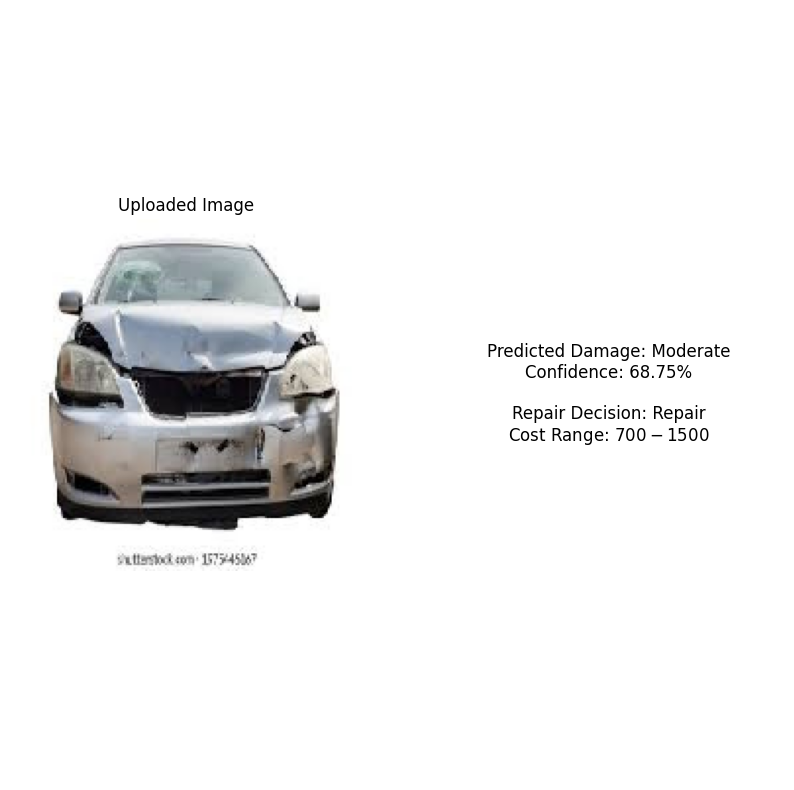

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('frontbuffer_damage_model_mobilenet.keras')

# Define image dimensions
img_width = 180
img_height = 180

# Function to estimate cost range and decision based on damage severity for front buffer
def estimate_front_buffer_cost(severity):
    if severity == "Minor":
        return "Repair", "$200 - $700"
    elif severity == "Moderate":
        return "Repair", "$700 - $1500"
    elif severity == "Severe":
        return "Replace", "Over $1500"
    else:
        return "N/A", "N/A"

# Load and preprocess the image
image_path = "/content/drive/MyDrive/headlight/Renamed/WhatsApp Image 2024-02-19 at 12.44.58.jpeg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

# Predict the class of the image
prediction = loaded_model.predict(image_array)
predicted_class_index = np.argmax(prediction)
confidence = np.max(prediction) * 100

# Define class names
class_names = ['undamaged', 'minor damage', 'moderate damage', 'severe damage']

# Check if the predicted class indicates damage
if class_names[predicted_class_index] != 'undamaged':
    # Further analyze the confidence level to categorize the damage
    if confidence >= 80:
        damage_category = 'Severe'
    elif confidence >= 60:
        damage_category = 'Moderate'
    else:
        damage_category = 'Minor'

    print("The uploaded image shows", damage_category, "damage with a confidence of", confidence, "%.")

    # Estimate damage cost based on severity
    repair_decision, cost_range = estimate_front_buffer_cost(damage_category)

    # Display the image with the predicted damage category and cost information
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Uploaded Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    text = f"Predicted Damage: {damage_category}\n"
    text += f"Confidence: {confidence:.2f}%\n\n"
    text += f"Repair Decision: {repair_decision}\n"
    text += f"Cost Range: {cost_range}"
    plt.text(0.5, 0.5, text, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis("off")


    plt.show()
else:
    print("The uploaded image shows no damage.")

    # Display the undamaged image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title("Undamaged")
    plt.axis("off")
    plt.show()
